##### **Project Type**    - EDA\Regression
##### **Contribution**    - Individual
##### **GitHub Link -** 

***Project Name**    - CSAT Prediction using Deep Learning*
--


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
cdata=pd.read_csv("eCommerce_Customer_support_data.csv")

In [3]:
cdata.shape

(85907, 20)

In [4]:
cdata.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [5]:
columns=['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded',
       'Survey_response_Date', 'Customer_City', 'Product_category',
       'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']

In [6]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [7]:
cdata[cdata["Customer Remarks"].isna()]

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85900,9ecbd0e0-dff3-475d-aca2-297144229e9c,Inbound,Order Related,Delayed,NaN,1b033755-0b17-4f3b-901c-f173c03c95e2,14/08/2023 18:43,31/08/2023 11:42,31/08/2023 11:45,31-Aug-23,BHUPALAPALLI,Books & General merchandise,193.0,NaN,Diana White,Layla Taniguchi,Emily Chen,>90,Morning,5
85901,2f4c7a58-c23b-4933-b65e-b6dbbb368b49,Inbound,Order Related,Order status enquiry,NaN,0cf9615a-60e7-4696-b679-a5602634fb29,28/08/2023 18:48,29/08/2023 19:13,31/08/2023 15:11,31-Aug-23,IBRAHIMPATNAM,Mobile,23999.0,NaN,William Hall,Isabella Wong,John Smith,>90,Morning,5
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


In [8]:
len(cdata["Unique id"].unique())

85907

In [9]:
len(cdata["Order_id"].unique())

67676

In [10]:
# Seetting unique id as dataframe Index
cdata.set_index("Unique id", inplace =True)

In [11]:
list(cdata.columns)==columns

True

In [12]:
cdata.head(2)

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5


In [13]:
cdata.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [14]:
cdata.nunique()
# of unique values in each column

channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

In [15]:
cdata[cdata["Customer Remarks"].notnull()].shape

(28742, 19)

In [16]:
cdata[cdata.duplicated()]

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
01a6c10b-e559-4392-a9a9-24f1f9bdede4,Inbound,Order Related,Installation/demo,NaN,NaN,NaN,04/08/2023 09:54,04/08/2023 10:00,04-Aug-23,NaN,NaN,NaN,NaN,Kathryn Vasquez,Noah Patel,Michael Lee,>90,Morning,5


In [17]:
cdata.drop_duplicates(inplace=True)

In [18]:
cdata[cdata.duplicated()]

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,


In [19]:
cdata.head()

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [20]:
cdata.isna().sum()

channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57164
Order_id                   18231
order_date_time            68692
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68827
Product_category           68710
Item_price                 68700
connected_handling_time    85664
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [21]:
# Checking null values by %
cdata.isna().sum()/cdata.shape[0]*100

channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542500
Order_id                   21.222033
order_date_time            79.961819
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.118967
Product_category           79.982772
Item_price                 79.971131
connected_handling_time    99.718297
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64

In [22]:
#cdata.replace(np.nan,"NaN",inplace=True)

In [23]:
cdata[cdata["connected_handling_time"].notnull()]

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
2e70fcce-8d1c-4219-ba3a-ad3d9c9242bf,Inbound,Order Related,Order status enquiry,NaN,NaN,NaN,03/08/2023 18:41,03/08/2023 18:42,03-Aug-23,NaN,NaN,NaN,206.0,Corey Gibson,Alexander Tanaka,Michael Lee,0-30,Evening,5
dd386ebf-a0ea-4fa2-8f69-1423e5d617b3,Inbound,Product Queries,Product Specific Information,NaN,NaN,NaN,03/08/2023 12:25,03/08/2023 12:51,03-Aug-23,NaN,NaN,NaN,303.0,Jacob Hester,Emily Yamashita,John Smith,>90,Morning,4
a75c2b3e-0e2f-40b0-8353-bd046fa2ec4f,Email,Returns,Damaged,NaN,NaN,NaN,04/08/2023 14:19,04/08/2023 15:20,04-Aug-23,NaN,NaN,NaN,156.0,Cole Moore,Emma Park,John Smith,31-60,Morning,5
225ff7cd-0906-46c9-b259-046e01700f3c,Inbound,Shopzilla Related,Shopzila Premium Related,Pathetic customer care,NaN,NaN,04/08/2023 17:11,04/08/2023 21:56,04-Aug-23,NaN,NaN,NaN,0.0,Robert Lara,Brayden Wong,John Smith,31-60,Evening,1
4adaaef1-0f9c-4c93-b175-3b692deed437,Outcall,Cancellation,Return cancellation,Thanks for all of you.,7dac1162-3426-4559-baf2-2507e4f33e15,NaN,05/08/2023 17:04,05/08/2023 17:07,05-Aug-23,NaN,NaN,NaN,240.0,Jasmine Maxwell,Olivia Wang,Olivia Tan,>90,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06c7100c-19be-4086-b11a-845dd97e127c,Inbound,Shopzilla Related,General Enquiry,good service & good sport,cd5229f0-b255-4826-be9b-49a3270d84e9,NaN,30/08/2023 12:44,30/08/2023 12:49,30-Aug-23,NaN,NaN,NaN,527.0,Cynthia Sheppard,Olivia Wang,Emily Chen,31-60,Evening,5
ae45d9ff-efa6-4e73-902a-613502a63e20,Inbound,Order Related,Priority delivery,NaN,efb3eb9b-7c61-4359-bda3-5108799ba8d5,NaN,30/08/2023 08:36,30/08/2023 08:38,30-Aug-23,NaN,NaN,NaN,282.0,Madison Flores,Ethan Tan,Jennifer Nguyen,On Job Training,Evening,5
a7d4705a-d107-4b90-877f-7b5a11b74541,Inbound,Refund Related,Refund Enquiry,Thank you Shopzilla support,4667678f-5c16-42e0-b5d0-74d8059de66e,NaN,30/08/2023 13:06,30/08/2023 13:07,30-Aug-23,NaN,NaN,NaN,429.0,Michael Ellison,Ethan Nakamura,Jennifer Nguyen,On Job Training,Morning,5


In [24]:
cdata[cdata["Customer Remarks"].notnull()]

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01/08/2023 16:17,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01/08/2023 21:03,01/08/2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
4c28acf4-2ea4-4be8-b8f1-113e676fc8b7,Inbound,Order Related,Delayed,Very bad,55bbace3-eb2e-4f67-aacb-4f8ee8512f75,19/07/2023 23:50,02/08/2023 10:44,02/08/2023 11:14,02-Aug-23,NAGPUR,LifeStyle,434.0,NaN,Stanley Hogan,Harper Wong,Emily Chen,>90,Split,1
c54459b3-ffb3-4ffa-a338-6fd179beb6b1,Inbound,Order Related,Installation/demo,Something,0cdaa1f1-02f2-40ec-9134-7cd0f92a6b3e,NaN,01/08/2023 10:00,01/08/2023 10:04,01-Aug-23,NaN,NaN,NaN,NaN,Jennifer May,Zoe Yamamoto,William Kim,On Job Training,Morning,3
6e51734e-9627-4a12-8062-877c3638627d,Inbound,Order Related,Installation/demo,All good,8a1ae638-4d8c-4a5e-bf1b-eb74f881fc3d,18/07/2023 12:20,02/08/2023 20:03,02/08/2023 20:05,02-Aug-23,NAGPUR,Electronics,15990.0,NaN,David Butler,Olivia Wang,Emily Chen,31-60,Evening,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4b666b79-a622-4e88-b284-bbb7e5d887cf,Inbound,Returns,Reverse Pickup Enquiry,If the customer care guy and their supervisors...,330cff59-5fa6-4ffb-a5b7-64d736d375c3,NaN,31/08/2023 22:12,31/08/2023 22:20,31-Aug-23,NaN,NaN,NaN,NaN,Robert Lara,Brayden Wong,John Smith,31-60,Evening,1
e88a149f-3f87-4d8f-9e2f-3d1f1a9b7525,Inbound,Returns,Reverse Pickup Enquiry,Good my problem was solved,dac0de59-0447-4448-ae08-97bdcc6fe738,NaN,31/08/2023 12:12,31/08/2023 12:13,31-Aug-23,NaN,NaN,NaN,NaN,Morgan Floyd,Ethan Tan,William Kim,On Job Training,Morning,5
ceb3f6c4-6be2-4cd4-aac4-7f7416ac0519,Inbound,Payments related,Payment related Queries,Trough the Shopzilla App Refunding Policy shou...,c2b1ff0a-94b3-4a7b-811b-fc553d2c1980,NaN,31/08/2023 00:16,31/08/2023 12:23,31-Aug-23,NaN,NaN,NaN,NaN,Holly Huang,Charlotte Suzuki,William Kim,On Job Training,Morning,5


In [25]:
cdata.shape

(85906, 19)

In [26]:
cdata[cdata["connected_handling_time"].isna()]

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5


Checking for Sentiment Score for Customer remarks as this will help in predicting CSAT score

In [27]:
def sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    return score["compound"]

In [28]:
#cdata["Customer Remarks"].fillna("No remarks", inplace=True)


In [29]:
cdata.fillna({"Customer Remarks":"No_Remarks"}, inplace=True)

In [30]:
cdata.head(2)

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No_Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No_Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5


In [31]:
sentiment_score("need to improve with proper details.")

0.4404

In [32]:
cdata.nunique()

channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18232
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

In [33]:
cdata["Customer Remarks"].apply(lambda x: np.nan if x=="No_Remarks" else sentiment_score(x))

Unique id
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f       NaN
b07ec1b0-f376-43b6-86df-ec03da3b2e16       NaN
200814dd-27c7-4149-ba2b-bd3af3092880       NaN
eb0d3e53-c1ca-42d3-8486-e42c8d622135       NaN
ba903143-1e54-406c-b969-46c52f92e5df       NaN
                                         ...  
505ea5e7-c475-4fac-ac36-1d19a4cb610f       NaN
44b38d3f-1523-4182-aba2-72917586647c    0.6369
723bce2c-496c-4aa8-a64b-ca17004528f0    0.4404
707528ee-6873-4192-bfa9-a491f1c08ab5       NaN
07c7a878-0d5a-42e0-97ef-de59abec0238       NaN
Name: Customer Remarks, Length: 85906, dtype: float64

In [34]:
cdata["Sentiment_score"] = cdata["Customer Remarks"].apply(lambda x: np.nan if x=="No_Remarks" else sentiment_score(x))

In [35]:
cdata[cdata["Customer Remarks"]=="No_Remarks"]["CSAT Score"].value_counts()

CSAT Score
5    39949
4     8616
1     5882
3     1828
2      889
Name: count, dtype: int64

In [36]:
cdata[cdata["Customer Remarks"]!="No_Remarks"]["CSAT Score"].value_counts()

CSAT Score
5    19667
1     5348
4     2603
3      730
2      394
Name: count, dtype: int64

In [38]:
cdata

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Sentiment_score
Unique id,,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No_Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,NaN
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No_Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,NaN
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,No_Remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,NaN
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,No_Remarks,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,NaN
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,No_Remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,No_Remarks,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4,NaN
44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5,0.6369
723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5,0.4404


In [49]:
cdata.columns=cdata.columns.str.lower().str.replace(" ","_")

In [50]:
cdata.columns

Index(['channel_name', 'category', 'sub-category', 'customer_remarks',
       'order_id', 'order_date_time', 'issue_reported_at', 'issue_responded',
       'survey_response_date', 'customer_city', 'product_category',
       'item_price', 'connected_handling_time', 'agent_name', 'supervisor',
       'manager', 'tenure_bucket', 'agent_shift', 'csat_score',
       'sentiment_score'],
      dtype='object')

In [59]:
cdata.head(2)

,channel_name,category,sub-category,customer_remarks,order_id,order_date_time,issue_reported_at,issue_responded,survey_response_date,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score,sentiment_score
Unique id,,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No_Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,NaN
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No_Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,NaN


In [61]:
cdata["issue_resolution_time"]=pd.to_datetime(cdata["issue_responded"], format="%d/%m/%Y %H:%M")-pd.to_datetime(cdata["issue_reported_at"], format="%d/%m/%Y %H:%M")

In [84]:
cdata["issue_resolution_time"].astype("timedelta64[s]").dt.seconds/60

Unique id
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f     34.0
b07ec1b0-f376-43b6-86df-ec03da3b2e16      2.0
200814dd-27c7-4149-ba2b-bd3af3092880     22.0
eb0d3e53-c1ca-42d3-8486-e42c8d622135     20.0
ba903143-1e54-406c-b969-46c52f92e5df      2.0
                                        ...  
505ea5e7-c475-4fac-ac36-1d19a4cb610f    482.0
44b38d3f-1523-4182-aba2-72917586647c      2.0
723bce2c-496c-4aa8-a64b-ca17004528f0      5.0
707528ee-6873-4192-bfa9-a491f1c08ab5      1.0
07c7a878-0d5a-42e0-97ef-de59abec0238      1.0
Name: issue_resolution_time, Length: 85906, dtype: float64

In [85]:
cdata["issue_resolution_time"]=cdata["issue_resolution_time"].astype("timedelta64[s]").dt.seconds/60

In [89]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85906 entries, 7e9ae164-6a8b-4521-a2d4-58f7c9fff13f to 07c7a878-0d5a-42e0-97ef-de59abec0238
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   channel_name             85906 non-null  object 
 1   category                 85906 non-null  object 
 2   sub-category             85906 non-null  object 
 3   customer_remarks         85906 non-null  object 
 4   order_id                 67675 non-null  object 
 5   order_date_time          17214 non-null  object 
 6   issue_reported_at        85906 non-null  object 
 7   issue_responded          85906 non-null  object 
 8   survey_response_date     85906 non-null  object 
 9   customer_city            17079 non-null  object 
 10  product_category         17196 non-null  object 
 11  item_price               17206 non-null  float64
 12  connected_handling_time  242 non-null    float64
 13  agent_name     

In [91]:
cdata[cdata["sentiment_score"].isna()]

,channel_name,category,sub-category,customer_remarks,order_id,order_date_time,issue_reported_at,issue_responded,survey_response_date,customer_city,...,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score,sentiment_score,issue_resolution_time
Unique id,,,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No_Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,...,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,NaN,34.0
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No_Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,...,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,NaN,2.0
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,No_Remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,...,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,NaN,22.0
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,No_Remarks,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,...,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,NaN,20.0
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,No_Remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,...,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9ecbd0e0-dff3-475d-aca2-297144229e9c,Inbound,Order Related,Delayed,No_Remarks,1b033755-0b17-4f3b-901c-f173c03c95e2,14/08/2023 18:43,31/08/2023 11:42,31/08/2023 11:45,31-Aug-23,BHUPALAPALLI,...,193.0,NaN,Diana White,Layla Taniguchi,Emily Chen,>90,Morning,5,NaN,3.0
2f4c7a58-c23b-4933-b65e-b6dbbb368b49,Inbound,Order Related,Order status enquiry,No_Remarks,0cf9615a-60e7-4696-b679-a5602634fb29,28/08/2023 18:48,29/08/2023 19:13,31/08/2023 15:11,31-Aug-23,IBRAHIMPATNAM,...,23999.0,NaN,William Hall,Isabella Wong,John Smith,>90,Morning,5,NaN,1198.0
505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,No_Remarks,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,...,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4,NaN,482.0


In [94]:
cdata[["sentiment_score","csat_score"]].describe()

,sentiment_score,csat_score
count,28742.000000,85906.000000
mean,0.252812,4.242148
std,0.401511,1.378909
min,-0.997000,1.000000
25%,0.000000,4.000000
50%,0.421500,5.000000
75%,0.492700,5.000000
max,0.991100,5.000000


In [95]:
cdata.groupby("channel_name")["sentiment_score"].mean()

channel_name
Email      0.164609
Inbound    0.256420
Outcall    0.254515
Name: sentiment_score, dtype: float64

In [97]:
cdata.groupby("channel_name")["csat_score"].mean()

channel_name
Email      3.899107
Inbound    4.251361
Outcall    4.269909
Name: csat_score, dtype: float64

In [99]:
cdata.select_dtypes(include=["int","float","bool"]).columns

Index(['item_price', 'connected_handling_time', 'csat_score',
       'sentiment_score', 'issue_resolution_time'],
      dtype='object')

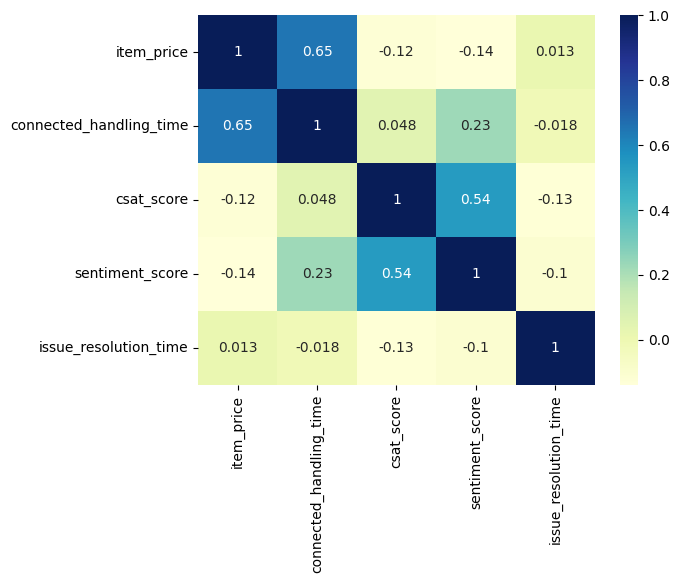

In [104]:
sns.heatmap(cdata.select_dtypes(include=["int","float","bool","datetime"]).corr(), annot=True, cmap="YlGnBu");

In [105]:
cdata.columns

Index(['channel_name', 'category', 'sub-category', 'customer_remarks',
       'order_id', 'order_date_time', 'issue_reported_at', 'issue_responded',
       'survey_response_date', 'customer_city', 'product_category',
       'item_price', 'connected_handling_time', 'agent_name', 'supervisor',
       'manager', 'tenure_bucket', 'agent_shift', 'csat_score',
       'sentiment_score', 'issue_resolution_time'],
      dtype='object')

In [108]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85906 entries, 7e9ae164-6a8b-4521-a2d4-58f7c9fff13f to 07c7a878-0d5a-42e0-97ef-de59abec0238
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   channel_name             85906 non-null  object 
 1   category                 85906 non-null  object 
 2   sub-category             85906 non-null  object 
 3   customer_remarks         85906 non-null  object 
 4   order_id                 67675 non-null  object 
 5   order_date_time          17214 non-null  object 
 6   issue_reported_at        85906 non-null  object 
 7   issue_responded          85906 non-null  object 
 8   survey_response_date     85906 non-null  object 
 9   customer_city            17079 non-null  object 
 10  product_category         17196 non-null  object 
 11  item_price               17206 non-null  float64
 12  connected_handling_time  242 non-null    float64
 13  agent_name     

In [106]:
knn_impute_columns=[
    'channel_name', 'category', 'sub-category',  'customer_city', 'product_category','item_price', 'connected_handling_time', 'agent_name', 'supervisor',
       'manager', 'tenure_bucket', 'agent_shift','sentiment_score', 'issue_resolution_time'
]

In [ ]:
label_columns=[
    'channel_name', 'category', 'sub-category',  'customer_city', 'product_category', 'agent_name', 'supervisor',
       'manager', 'tenure_bucket', 'agent_shift'
]

In [113]:
numeric_columns=['item_price', 'connected_handling_time', 'issue_resolution_time']

In [115]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
imputer=KNNImputer(n_neighbors=5)
encoder=OrdinalEncoder()
label_encoder=encoder.fit(cdata[label_columns])
encoded_data=cdata.copy()
encoded_data[label_columns]=label_encoder.transform(cdata[label_columns])
encoded_data.head(2)

,channel_name,category,sub-category,customer_remarks,order_id,order_date_time,issue_reported_at,issue_responded,survey_response_date,customer_city,...,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score,sentiment_score,issue_resolution_time
Unique id,,,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,2.0,8.0,19.0,No_Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,...,NaN,NaN,1072.0,26.0,1.0,4.0,2.0,5,NaN,34.0
b07ec1b0-f376-43b6-86df-ec03da3b2e16,2.0,8.0,34.0,No_Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,...,NaN,NaN,1323.0,9.0,3.0,3.0,2.0,5,NaN,2.0


In [116]:
imputer.fit(encoded_data[knn_impute_columns])

,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
encoded_data[knn_impute_columns]=imputer.transform(encoded_data[knn_impute_columns])